In [2]:
import numpy as np
import pandas as pd
import math
import requests 
import matplotlib as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as web
from pandas_datareader import data
from bs4 import BeautifulSoup as bs
from scipy import stats
import sqlite3
import time

"""
#Create db
conn = sqlite3.connect('financial_data.db')

# Create a cursor
cursor = conn.cursor()
"""
# Create the first table
#all_time_prices_query = 
'''
CREATE TABLE all_time_prices (
    Date INTEGER PRIMARY KEY,
    Open FLOAT,
    High FLOAT, 
    Low FLOAT, 
    Close FLOAT, 
    Volume FLOAT,
    Dividends FLOAT, 
    Stock Splits FLOAT, 
    Ticker TEXT NOT NULL    
);
'''

#cursor.execute(all_time_prices_query)

"""

momentum_query = '''
CREATE TABLE momentum (
    Date INTEGER PRIMARY KEY,
    Open FLOAT,
    High FLOAT, 
    Low FLOAT, 
    Close FLOAT, 
    Volume FLOAT,
    Dividends FLOAT, 
    Stock Splits FLOAT, 
    Ticker TEXT NOT NULL    
);
'''

cursor.execute(momentum_query)

conn.commit()

# Close the connection
conn.close()
"""

"\n\nmomentum_query = '''\nCREATE TABLE momentum (\n    Date INTEGER PRIMARY KEY,\n    Open FLOAT,\n    High FLOAT, \n    Low FLOAT, \n    Close FLOAT, \n    Volume FLOAT,\n    Dividends FLOAT, \n    Stock Splits FLOAT, \n    Ticker TEXT NOT NULL    \n);\n'''\n\ncursor.execute(momentum_query)\n\nconn.commit()\n\n# Close the connection\nconn.close()\n"

In [3]:
#Create first table with all stock info from yfinance
tick = pd.read_csv("all_stocks")
all_time_cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Ticker']
all_time = pd.DataFrame(columns = all_time_cols)
count = 0 
for i in range(len(tick)): 
    start = time.time()    
    try:
        #Creating the df to be added to all_time_prices
        ticker = tick["0"][i]
        info = yf.Ticker(ticker).history(period='max')
        info.reset_index(inplace = True)
        info['Ticker'] = ticker
        # Append the first dataframe to the table
        all_time = pd.concat([all_time, info])
        #print(momentum_append)
    except TypeError: 
        print("Nonetype found for: " + tick["0"][i])
        continue
    except IndexError: 
        print("Couldn't find: ",tick["0"][i])
        continue
    except KeyError:
        print("Couldnt find key for: " + tick['0'][i])
        continue
    stop = time.time()
    duration = stop-start
    print(duration)

#PUSH TO DATABASE
#all_time.to_sql('all_time_prices', conn, if_exists='append', index=False)

3.2643930912017822
0.21088361740112305
0.25600552558898926
0.4369242191314697
0.7471764087677002
0.27788591384887695
0.46116137504577637
0.24639415740966797
0.40215229988098145
0.3586304187774658
0.32320404052734375
0.25307631492614746
0.6674609184265137
0.32642269134521484
0.3623807430267334
0.2682521343231201
Got error from yahoo api for ticker ATV, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ATV: No timezone found, symbol may be delisted
0.1168510913848877
Got error from yahoo api for ticker ATU, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ATU: No timezone found, symbol may be delisted
0.1422257423400879
0.34128904342651367
0.3167152404785156
0.4038381576538086
0.30692410469055176
0.26708245277404785
0.43879103660583496
0.3185770511627197
Got error from yahoo api for ticker ADSW, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
- ADSW: No timezone found, symbol m

KeyboardInterrupt: 

<AxesSubplot:>

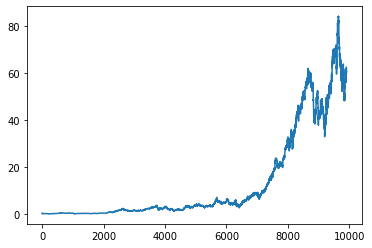

In [11]:
all_time[all_time['Ticker'] == "AOS"]['Close'].plot()